# Preprocessing the dataset

The aim of this notebook is to preprocess the dataset obtained from Kaggle into a format that can be used by the models to be trained later.

There should be a directory called "Dataset" on the same level as this notebook, that stores the datasets used and produced by this notebook.

### Input: 
- User0_credit_card_transactions.csv
- mcc_descriptions.csv
### Output: 
- preprocessed_dataset.csv

In [1]:
import pandas as pd

### Get Overview of the data and the data types

In [2]:
data = pd.read_csv("./Dataset/User0_credit_card_transactions.csv")
data.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,6:21,$134.09,Swipe Transaction,3.527210e+18,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,6:42,$38.48,Swipe Transaction,-7.276120e+17,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,6:22,$120.34,Swipe Transaction,-7.276120e+17,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3.414530e+18,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,6:23,$104.71,Swipe Transaction,5.817220e+18,La Verne,CA,91750.0,5912,NaN,No


In [3]:
data.shape

(19963, 15)

### Drop duplicates

In [4]:
data.drop_duplicates(inplace=True)
data.shape

(19963, 15)

### Drop empty values

In [5]:
data.dropna
data.shape

(19963, 15)

### Drop unnecessary columns, these will be of no use

In [6]:
data= data.drop(['Merchant Name', 'Merchant City', 'Merchant State', 'Zip', 'Is Fraud?'], axis=1, inplace=False)

### Reset index

In [7]:
data.reset_index(drop=True)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,MCC,Errors?
0,0,0,2002,9,1,6:21,$134.09,Swipe Transaction,5300,NaN
1,0,0,2002,9,1,6:42,$38.48,Swipe Transaction,5411,NaN
2,0,0,2002,9,2,6:22,$120.34,Swipe Transaction,5411,NaN
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,5651,NaN
4,0,0,2002,9,3,6:23,$104.71,Swipe Transaction,5912,NaN
...,...,...,...,...,...,...,...,...,...,...
19958,0,4,2009,2,12,13:03,$9.71,Swipe Transaction,5411,Technical Glitch
19959,0,4,2009,2,22,11:58,$27.94,Swipe Transaction,5211,NaN
19960,0,4,2009,2,24,16:53,$13.97,Swipe Transaction,5912,NaN
19961,0,4,2009,3,29,16:30,$14.27,Swipe Transaction,5411,NaN


### Remove the dollar sign from the 'Amount' column

In [8]:
data['Amount'] = data['Amount'].str[1:]

In [9]:
data.dtypes

User         int64
Card         int64
Year         int64
Month        int64
Day          int64
Time        object
Amount      object
Use Chip    object
MCC          int64
Errors?     object
dtype: object

In [10]:
data.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,MCC,Errors?
0,0,0,2002,9,1,6:21,134.09,Swipe Transaction,5300,NaN
1,0,0,2002,9,1,6:42,38.48,Swipe Transaction,5411,NaN
2,0,0,2002,9,2,6:22,120.34,Swipe Transaction,5411,NaN
3,0,0,2002,9,2,17:45,128.95,Swipe Transaction,5651,NaN
4,0,0,2002,9,3,6:23,104.71,Swipe Transaction,5912,NaN


### Convert columns to appropriate datatypes

In [11]:
columns_to_convert_STR = ["Use Chip", "Errors?"]

data["Amount"]=pd.to_numeric(data["Amount"], errors="coerce")

for column in columns_to_convert_STR:
    data[column] = data[column].astype("string")

datetime_list = []

for index, row in data.iterrows():
  year, month, day = row['Year'], row['Month'], row['Day']
  time = row['Time']
  datetime_list.append(pd.to_datetime(f"{year}-{month:02d}-{day:02d} {time}", format='%Y-%m-%d %H:%M'))

data['DateTime'] = datetime_list

data.drop(columns=['Year', 'Month', 'Day', 'Time'], inplace=True)
data.head(10)

data.dtypes

User                 int64
Card                 int64
Amount             float64
Use Chip    string[python]
MCC                  int64
Errors?     string[python]
DateTime    datetime64[ns]
dtype: object

### Limit the 'Use Chip' values to 'on-site' and 'online', renaming the column to 'Payment Method'

In [12]:
data['Use Chip'].value_counts()

Use Chip
Swipe Transaction     15840
Chip Transaction       2808
Online Transaction     1315
Name: count, dtype: Int64

In [13]:
replacements = {'Swipe Transaction': 'on-site', 'Chip Transaction ': 'on-site', 'Online Transaction':'online'}
data['Use Chip'] = data['Use Chip'].replace(replacements)
new={'Use Chip': 'Payment Method'}
data = data.rename(columns=new)
data.head()


,User,Card,Amount,Payment Method,MCC,Errors?,DateTime
0,0,0,134.09,on-site,5300,<NA>,2002-09-01 06:21:00
1,0,0,38.48,on-site,5411,<NA>,2002-09-01 06:42:00
2,0,0,120.34,on-site,5411,<NA>,2002-09-02 06:22:00
3,0,0,128.95,on-site,5651,<NA>,2002-09-02 17:45:00
4,0,0,104.71,on-site,5912,<NA>,2002-09-03 06:23:00


### Find the number of MCC's used in the dataset

In [14]:
data['MCC'].value_counts()

MCC
5411    3748
5912    3376
5300    1934
5541    1693
5311    1175
        ... 
5816       1
4411       1
7549       1
5947       1
3009       1
Name: count, Length: 94, dtype: int64

### Get idea of what errors showed up in the system

In [15]:
data['Errors?'].value_counts()

Errors?
Insufficient Balance            469
Technical Glitch                 46
Bad PIN                          42
Bad Expiration                    9
Bad Card Number                   4
Bad CVV                           2
Bad PIN,Insufficient Balance      1
Bad PIN,Technical Glitch          1
Name: count, dtype: Int64

In [16]:
data.shape

(19963, 7)

### Check number of empty 'Errors?' values

In [17]:
data = data[data['Errors?'].isna()]
data.shape


(19389, 7)

In [18]:
data.head()

,User,Card,Amount,Payment Method,MCC,Errors?,DateTime
0,0,0,134.09,on-site,5300,<NA>,2002-09-01 06:21:00
1,0,0,38.48,on-site,5411,<NA>,2002-09-01 06:42:00
2,0,0,120.34,on-site,5411,<NA>,2002-09-02 06:22:00
3,0,0,128.95,on-site,5651,<NA>,2002-09-02 17:45:00
4,0,0,104.71,on-site,5912,<NA>,2002-09-03 06:23:00


In [19]:
data.reset_index(drop=True)

,User,Card,Amount,Payment Method,MCC,Errors?,DateTime
0,0,0,134.09,on-site,5300,<NA>,2002-09-01 06:21:00
1,0,0,38.48,on-site,5411,<NA>,2002-09-01 06:42:00
2,0,0,120.34,on-site,5411,<NA>,2002-09-02 06:22:00
3,0,0,128.95,on-site,5651,<NA>,2002-09-02 17:45:00
4,0,0,104.71,on-site,5912,<NA>,2002-09-03 06:23:00
...,...,...,...,...,...,...,...
19384,0,4,22.70,on-site,5300,<NA>,2009-02-07 16:16:00
19385,0,4,27.94,on-site,5211,<NA>,2009-02-22 11:58:00
19386,0,4,13.97,on-site,5912,<NA>,2009-02-24 16:53:00
19387,0,4,14.27,on-site,5411,<NA>,2009-03-29 16:30:00


### Drop the 'Errors?' column because it is useless

In [20]:
data= data.drop(['Errors?'], axis=1, inplace=False)

In [21]:
data.head()

,User,Card,Amount,Payment Method,MCC,DateTime
0,0,0,134.09,on-site,5300,2002-09-01 06:21:00
1,0,0,38.48,on-site,5411,2002-09-01 06:42:00
2,0,0,120.34,on-site,5411,2002-09-02 06:22:00
3,0,0,128.95,on-site,5651,2002-09-02 17:45:00
4,0,0,104.71,on-site,5912,2002-09-03 06:23:00


### Create columns for detailed time for ease of use

In [22]:
data['Year'] = data['DateTime'].dt.year
data['Month'] = data['DateTime'].dt.month
data['Day'] = data['DateTime'].dt.day
data['Hour'] = data['DateTime'].dt.hour
data['Minute'] = data['DateTime'].dt.minute
data.head()

,User,Card,Amount,Payment Method,MCC,DateTime,Year,Month,Day,Hour,Minute
0,0,0,134.09,on-site,5300,2002-09-01 06:21:00,2002,9,1,6,21
1,0,0,38.48,on-site,5411,2002-09-01 06:42:00,2002,9,1,6,42
2,0,0,120.34,on-site,5411,2002-09-02 06:22:00,2002,9,2,6,22
3,0,0,128.95,on-site,5651,2002-09-02 17:45:00,2002,9,2,17,45
4,0,0,104.71,on-site,5912,2002-09-03 06:23:00,2002,9,3,6,23


### Drop old 'DateTime' column

In [23]:
data=data.drop('DateTime', axis=1)
data.head()

,User,Card,Amount,Payment Method,MCC,Year,Month,Day,Hour,Minute
0,0,0,134.09,on-site,5300,2002,9,1,6,21
1,0,0,38.48,on-site,5411,2002,9,1,6,42
2,0,0,120.34,on-site,5411,2002,9,2,6,22
3,0,0,128.95,on-site,5651,2002,9,2,17,45
4,0,0,104.71,on-site,5912,2002,9,3,6,23


### Find the number of unique MCC's

In [24]:
unique_values = data['MCC'].unique()
number_of_unique_values = len(unique_values)

print("Number of unique values:", number_of_unique_values)

Number of unique values: 94


### Create dataframe for unique MCC's

In [25]:
# Create a pandas Series from the array
data_series = pd.Series(unique_values)

# Create a DataFrame from the Series with a desired column name (optional)
mcc_df = pd.DataFrame(data_series, columns=['MCC'])


### Read the MCC descriptions from the file obtained online

In [26]:
mcc_data = pd.read_csv('./dataset/mcc_descriptions.csv')
mcc_data.head(10)

,MCC,IRSDescription
0,5300,Wholesale Clubs
1,5411,"Grocery Stores, Supermarkets"
2,5651,Family Clothing Stores
3,5912,Drug Stores and Pharmacies
4,5970,Artist’s Supply and Craft Shops
5,7538,Auto Service Shops
6,5814,Fast Food Restaurants
7,4900,Utilities
8,5541,Service Stations
9,5942,Book Stores


### Join our MCC's with the descriptions found online 

In [27]:
df_merged = pd.merge(data, mcc_data, on='MCC', how='left')

In [28]:
df_merged.head()

,User,Card,Amount,Payment Method,MCC,Year,Month,Day,Hour,Minute,IRSDescription
0,0,0,134.09,on-site,5300,2002,9,1,6,21,Wholesale Clubs
1,0,0,38.48,on-site,5411,2002,9,1,6,42,"Grocery Stores, Supermarkets"
2,0,0,120.34,on-site,5411,2002,9,2,6,22,"Grocery Stores, Supermarkets"
3,0,0,128.95,on-site,5651,2002,9,2,17,45,Family Clothing Stores
4,0,0,104.71,on-site,5912,2002,9,3,6,23,Drug Stores and Pharmacies


### Visualize the categories

C:\Users\NourH\AppData\Local\Temp\ipykernel_15648\3667652550.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


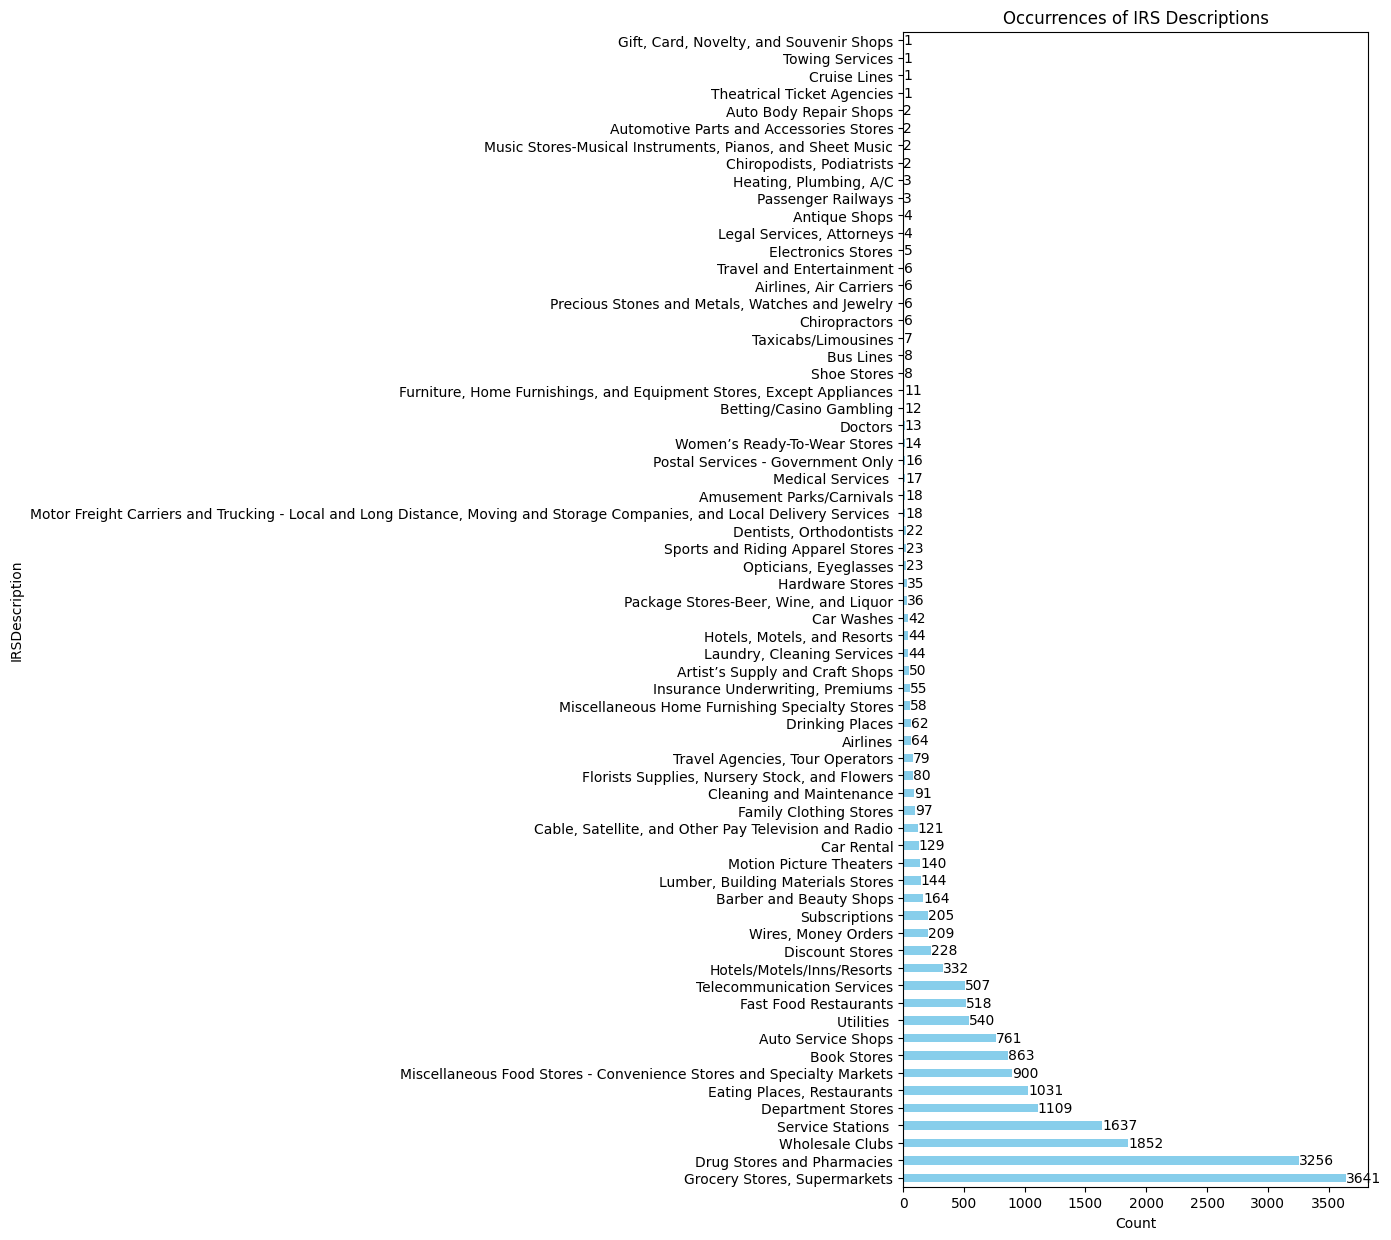

In [29]:
import matplotlib.pyplot as plt

value_counts = df_merged['IRSDescription'].value_counts()

plt.figure(figsize=(6, 15))  # Swap width and height for horizontal bars
bars = value_counts.plot(kind='barh', color='skyblue')  # 'h' for horizontal bars

# Add count labels at the end of each bar
for idx, value in enumerate(value_counts):
  plt.text(value + 0.1, idx, str(value), va='center')  # Adjust offset as needed

plt.xlabel('Count')
plt.ylabel('IRSDescription')  # Swap labels to match orientation
plt.title('Occurrences of IRS Descriptions')
plt.yticks(rotation=0)  # Rotate y-axis labels for readability (optional)
plt.tight_layout()
plt.show()

In [30]:
data=df_merged
data.head()

,User,Card,Amount,Payment Method,MCC,Year,Month,Day,Hour,Minute,IRSDescription
0,0,0,134.09,on-site,5300,2002,9,1,6,21,Wholesale Clubs
1,0,0,38.48,on-site,5411,2002,9,1,6,42,"Grocery Stores, Supermarkets"
2,0,0,120.34,on-site,5411,2002,9,2,6,22,"Grocery Stores, Supermarkets"
3,0,0,128.95,on-site,5651,2002,9,2,17,45,Family Clothing Stores
4,0,0,104.71,on-site,5912,2002,9,3,6,23,Drug Stores and Pharmacies


### Group the similar MCC's with the appropriate service category we agrred upon, then save the dataframe in a csv file to be used in training any models

The categories we are limiting the values to are:
- Rent/Mortgage
- Healthcare
- Insurance
- Utilities
- Food/Groceries
- Childcare
- Transportation
- Personal Spending
- Home Goods
- Clothing
- Pets
- Restaurants
- Travel & Entertainment
- Electronics
- Beauty Products
- Services
- Subscriptions

In [31]:
Category_list = 'NA'
data['Category'] = Category_list
data.head()

,User,Card,Amount,Payment Method,MCC,Year,Month,Day,Hour,Minute,IRSDescription,Category
0,0,0,134.09,on-site,5300,2002,9,1,6,21,Wholesale Clubs,NA
1,0,0,38.48,on-site,5411,2002,9,1,6,42,"Grocery Stores, Supermarkets",NA
2,0,0,120.34,on-site,5411,2002,9,2,6,22,"Grocery Stores, Supermarkets",NA
3,0,0,128.95,on-site,5651,2002,9,2,17,45,Family Clothing Stores,NA
4,0,0,104.71,on-site,5912,2002,9,3,6,23,Drug Stores and Pharmacies,NA


In [32]:
category_map = {
    "Wholesale Clubs": "Personal Spending",
    "Grocery Stores, Supermarkets": "Food/Groceries",
    "Family Clothing Stores": "Clothing",
    "Drug Stores and Pharmacies": "Healthcare",
    "Artist’s Supply and Craft Shops": "Personal Spending",
    "Auto Service Shops": "Transportation",
    "Fast Food Restaurants": "Restaurants",
    "Utilities ": "Utilities",
    "Service Stations ": "Transportation",
    "Book Stores": "Personal Spending",
    "Motion Picture Theaters": "Travel & Entertainment",
    "Department Stores": "Clothing",
    "Cable, Satellite, and Other Pay Television and Radio": "Subscriptions",
    "Wires, Money Orders": "Personal Spending",
    "Eating Places, Restaurants": "Restaurants",
    "Miscellaneous Food Stores - Convenience Stores and Specialty Markets": "Food/Groceries",
    "Miscellaneous Home Furnishing Specialty Stores": "Home Goods",
    "Telecommunication Services": "Utilities",
    "Laundry, Cleaning Services": "Services",
    "Florists Supplies, Nursery Stock, and Flowers": "Personal Spending",
    "Airlines": "Travel & Entertainment",
    "Car Rental": "Transportation",
    "Insurance Underwriting, Premiums": "Insurance",
    "Opticians, Eyeglasses": "Healthcare",
    "Barber and Beauty Shops": "Personal Spending",
    "Lumber, Building Materials Stores": "Home Goods",
    "Discount Stores": "Clothing",
    "Doctors": "Healthcare",
    "Hotels/Motels/Inns/Resorts": "Travel & Entertainment",
    "Package Stores-Beer, Wine, and Liquor": "Food/Groceries",
    "Subscriptions": "Subscriptions",
    "Drinking Places": "Restaurants",
    "Car Washes": "Services",
    "Amusement Parks/Carnivals": "Travel & Entertainment",
    "Cleaning and Maintenance": "Services",
    "Postal Services - Government Only": "Services",
    "Sports and Riding Apparel Stores": "Clothing",
    "Hotels, Motels, and Resorts": "Travel & Entertainment",
    "Shoe Stores": "Clothing",
    "Travel Agencies, Tour Operators": "Travel & Entertainment",
    "Hardware Stores": "Home Goods",
    "Taxicabs/Limousines": "Transportation",
    "Medical Services ": "Healthcare",
    "Dentists, Orthodontists": "Healthcare",
    "Chiropractors": "Healthcare",
    "Motor Freight Carriers and Trucking - Local and Long Distance, Moving and Storage Companies, and Local Delivery Services": "Services",
    "Bus Lines": "Transportation",
    "Women’s Ready-To-Wear Stores": "Clothing",
    "Precious Stones and Metals, Watches and Jewelry": "Personal Spending",
    "Cruise Lines": "Travel & Entertainment",
    "Electronics Stores": "Electronics",
    "Theatrical Ticket Agencies": "Travel & Entertainment",
    "Airlines, Air Carriers": "Travel & Entertainment",
    "Passenger Railways": "Transportation",
    "Music Stores-Musical Instruments, Pianos, and Sheet Music": "Personal Spending",
    "Betting/Casino Gambling": "Travel & Entertainment",
    "Heating, Plumbing, A/C": "Services",
    "Chiropodists, Podiatrists": "Healthcare",
    "Furniture, Home Furnishings, and Equipment Stores, Except Appliances": "Home Goods",
    "Travel and Entertainment": "Travel & Entertainment",
    "Automotive Parts and Accessories Stores": "Transportation",
    "Antique Shops": "Personal Spending",
    "Legal Services, Attorneys": "Services",
    "Auto Body Repair Shops": "Transportation",
    "Towing Services": "Services",
    "Gift, Card, Novelty, and Souvenir Shops": "Personal Spending"
}

### Convert the IRSDescriptions to FUSE Categories

In [33]:
data['Category'] = data['IRSDescription'].apply(lambda x: category_map.get(x))

In [34]:
data.head()

,User,Card,Amount,Payment Method,MCC,Year,Month,Day,Hour,Minute,IRSDescription,Category
0,0,0,134.09,on-site,5300,2002,9,1,6,21,Wholesale Clubs,Personal Spending
1,0,0,38.48,on-site,5411,2002,9,1,6,42,"Grocery Stores, Supermarkets",Food/Groceries
2,0,0,120.34,on-site,5411,2002,9,2,6,22,"Grocery Stores, Supermarkets",Food/Groceries
3,0,0,128.95,on-site,5651,2002,9,2,17,45,Family Clothing Stores,Clothing
4,0,0,104.71,on-site,5912,2002,9,3,6,23,Drug Stores and Pharmacies,Healthcare


### Drop the old 'IRSDescription'

In [35]:
data=data.drop(['MCC','IRSDescription'],axis=1)

In [36]:
data.head()

,User,Card,Amount,Payment Method,Year,Month,Day,Hour,Minute,Category
0,0,0,134.09,on-site,2002,9,1,6,21,Personal Spending
1,0,0,38.48,on-site,2002,9,1,6,42,Food/Groceries
2,0,0,120.34,on-site,2002,9,2,6,22,Food/Groceries
3,0,0,128.95,on-site,2002,9,2,17,45,Clothing
4,0,0,104.71,on-site,2002,9,3,6,23,Healthcare


### Convert the datatype of the new column to String

In [37]:
data['Category'] = data['Category'].astype("string")

In [38]:
data.dtypes

User                       int64
Card                       int64
Amount                   float64
Payment Method    string[python]
Year                       int32
Month                      int32
Day                        int32
Hour                       int32
Minute                     int32
Category          string[python]
dtype: object

### Save to CSV file

In [39]:
data.to_csv("./Dataset/preprocessed_dataset.csv")

### Visualize final dataset categories

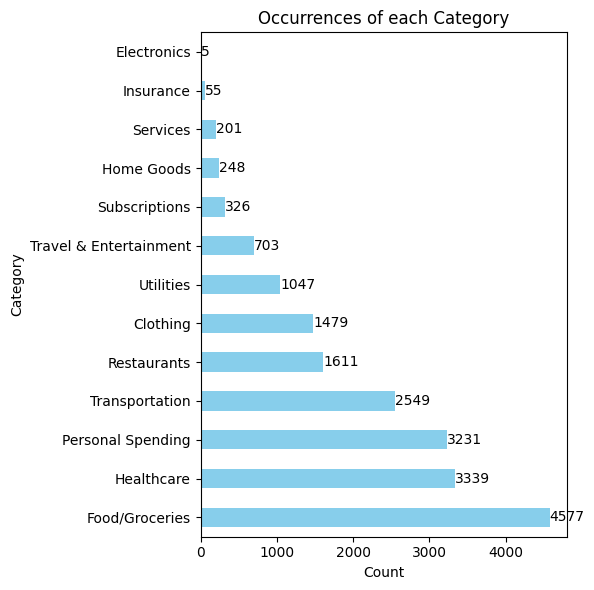

In [40]:
import matplotlib.pyplot as plt

value_counts = data['Category'].value_counts()

plt.figure(figsize=(6, 6))  # Swap width and height for horizontal bars
bars = value_counts.plot(kind='barh', color='skyblue')  # 'h' for horizontal bars

# Add count labels at the end of each bar
for idx, value in enumerate(value_counts):
  plt.text(value + 0.1, idx, str(value), va='center')  # Adjust offset as needed

plt.xlabel('Count')
plt.ylabel('Category')  # Swap labels to match orientation
plt.title('Occurrences of each Category')
plt.yticks(rotation=0)  # Rotate y-axis labels for readability (optional)
plt.tight_layout()
plt.show()